# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime, minimize
import matplotlib.pyplot as plt

### Задание 1
Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

$y = cos x$

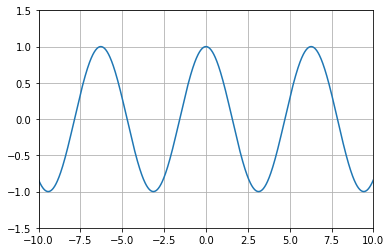

In [2]:
def function_1(x):
    return np.cos(x)

x = np.linspace(-10,10,1000)
y = function_1(x)

plt.grid()
plt.axis([-10,10,-1.5,1.5])
plt.plot(x, y)

b) 2 локальных экстремума

$y = x^3 + 2 * x^2$

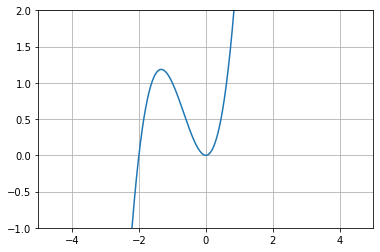

In [3]:
def function_2(x):
    return x**3 + 2 * x**2

x = np.linspace(-5,5,1000)
y = function_2(x)

plt.grid()
plt.axis([-5,5,-1,2])
plt.plot(x, y)

с) 3 локальных экстремума

$y = (x^3 + 5 * x^2)^2$

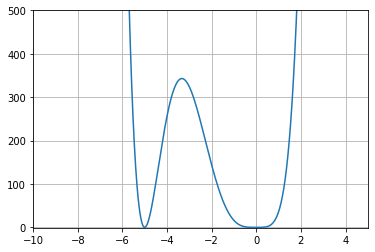

In [4]:
def function_3(x):
    return (𝑥**3 + (5 * 𝑥**2))**2

x = np.linspace(-10,5,1000)
y = function_3(x)

plt.grid()
plt.axis([-10,5,-1,500])
plt.plot(x, y)

d*) область определения функции - 1 точка

$y = sqrt(0 - (x + 3)^2)$

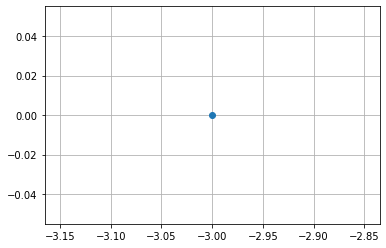

In [5]:
def function_4(x):
    return (0 - (x + 3)**2)**0.5

x = -3
y = function_4(x)

plt.grid()
plt.plot(x, y, 'o')

### Задание 2
Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

Первая производная:

$f'_x = 2sin(2 * x + 1) * cos(2 * x + 1) * 2 = 4 * sin(2 * x + 1) * cos(2 * x + 1)$

Вторая производная:

$f''_x = 4 * (-2 * sin(2 * x + 1)) * sin(2 * x + 1) + cos(2 * x + 1) * 2 * cos(2 * x + 1) * 2 =$

$f''_x = -8 * (sin(2 * x + 1))**2 + 8 * (cos(2 * x+1))**2$

### Задание 3:
Посчитайте частные производные функции в точкe (на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$f'_x=2*2*x*y^3 - 1/(x^2) + y^2 = 4xy^3 - 1/(x^2)+y^2$

$f'_y=2*x^2*3y^2 + 2yx = 6x^2y^2+2yx$

$f'_x(1,2) = 4*8-1+4 = 35$

$f'_y(1,2) = 6*4 + 2*2 = 28$

In [6]:
def f(x):
    return 2*x[0]**2*x[1]**3 + 1/x[0] + x[0]*x[1]**2 + 7

eps = np.sqrt(np.finfo(float).eps)
approx_fprime([1,2], f, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 4:
Градиентный спуск своими руками

In [7]:
def f_grad(x):
    return (x[0]**2) + (x[1]**2)

x0 = np.array([100, 200])
lr = 0.1

x = x0
for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x, f_grad, [1e-6, 1e-6])
    
    # Update x with gradient
    x = x - lr * grad

In [8]:
print(f'Минимум достигается в: {x}')
print(f'Значение функции в минимуме: {f_grad(x)}')

Минимум достигается в: [-4.7962964e-07 -4.5925928e-07]
Значение функции в минимуме: 4.4096367809465753e-13


Проверка с помощью встроенной функции scipy:

In [9]:
minimize(f_grad, x0, method='nelder-mead', options={'xtol': lr, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 42
         Function evaluations: 80


 final_simplex: (array([[ 0.00109217,  0.0065345 ],
       [ 0.00399457, -0.00778545],
       [-0.00979875, -0.00544776]]), array([4.38925421e-05, 7.65698978e-05, 1.25693670e-04]))
           fun: 4.3892542136876806e-05
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 42
        status: 0
       success: True
             x: array([0.00109217, 0.0065345 ])